In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/drive/My Drive/Edureka Machine Learning /Module-4 Supervised Learning-1/horse.csv')

In [4]:
df.shape

(299, 28)

In [5]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

### Data Cleaning and EDA

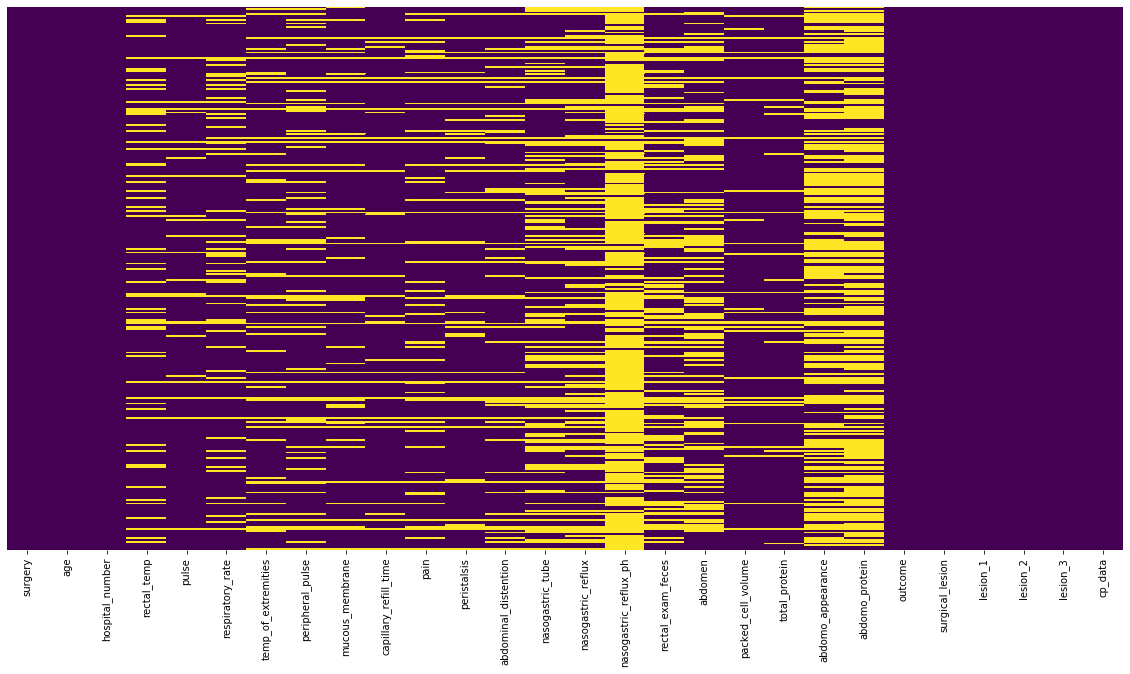

In [6]:
# Finding missing values using heatmap

plt.figure(figsize=[20,10])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


By this Heatmap we can observe that there are more null values in columns like nasogastric_reflux_ph,abdomo_appearance,abdomo_protein and we can observe that some rows having more number of null values

In [0]:
# we will drop the columns having more then 75% null values

df1 = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.75)], axis=1)

In [8]:
df1.shape

(299, 27)

In [0]:
# Dropping rows which are having more then 15 null values

df1 = df1[df1.isnull().sum(axis=1) < 15]

In [10]:
df1.shape

(287, 27)

In [11]:
# Dropping last 5 columns becuase most of the values contains 0 and they are not that much important features for predicting output.
# this will leads to Garbage in and Garbage out condition so, we are removing those features

df1 = df1.iloc[:,:-5]

# will drop 'hospital_number' it does not have any significance in the dataset

df1 = df1.drop('hospital_number',axis = 1)
df1.shape

(287, 21)

In [12]:
df1.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,48.0,7.2,serosanguious,5.3,died
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died


In [13]:
# No of null values in each column

df1.isnull().sum()

surgery                    0
age                        0
rectal_temp               52
pulse                     16
respiratory_rate          49
temp_of_extremities       44
peripheral_pulse          57
mucous_membrane           35
capillary_refill_time     20
pain                      43
peristalsis               32
abdominal_distention      44
nasogastric_tube          92
nasogastric_reflux        94
rectal_exam_feces         90
abdomen                  106
packed_cell_volume        21
total_protein             25
abdomo_appearance        154
abdomo_protein           186
outcome                    0
dtype: int64

In [0]:
# Filling numerical null values with mean


df2 = df1.copy()
numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()
df2[numeric_cols] = df2[numeric_cols].apply(lambda x:x.fillna(x.mean()))


In [15]:
df2.isnull().sum()

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       44
peripheral_pulse          57
mucous_membrane           35
capillary_refill_time     20
pain                      43
peristalsis               32
abdominal_distention      44
nasogastric_tube          92
nasogastric_reflux        94
rectal_exam_feces         90
abdomen                  106
packed_cell_volume         0
total_protein              0
abdomo_appearance        154
abdomo_protein             0
outcome                    0
dtype: int64

In [0]:
# Replacing the categorical values with most frequant values in respective columns

df3 = df2.copy()
categorical_features = df3.dtypes==object
categorical_cols = df3.columns[categorical_features].to_list()
df3[categorical_cols] = df3[categorical_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [17]:
df3.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
dtype: int64

In [0]:
# Splitting X and y 

df3['outcome'] = df3.outcome.map({'died':0,'euthanized':1,'lived':2})
X = df3.iloc[:,:-1]
y = df3['outcome']

In [0]:
# Creating dummy variables

df3_dummies = pd.get_dummies(X,drop_first=True)
X = df3_dummies

In [0]:
# Splitting test and train data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=10)

### Model Creation

In [31]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)


# Accuracy score for Decision Tree 

from sklearn.metrics import accuracy_score
print('Test Accuracy')
accuracy_score(y_test,y_pred)


Test Accuracy


0.6666666666666666

In [32]:
# K-Fold cross validation

from sklearn.model_selection import cross_val_score
scores  = cross_val_score(dt_model,X,y,scoring = 'accuracy',cv=10)
scores.mean()

0.6204433497536945

In [35]:
# Hyper parameter tuning by using gris search cv

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = [{'n_estimators':[10,50,100,200],'criterion':['entropy'],'max_depth':[2,3,4,5,6,7]},
              {'n_estimators':[10,50,100,200],'criterion':['gini'],'max_depth':[2,3,4,5,6,7]}]

grid_search = GridSearchCV(RandomForestClassifier(),param_grid = parameters,cv=10)
grid_search.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [36]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}

In [37]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', max_depth= 5, n_estimators= 50)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

# Accuracy score for Random Forest

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.7816091954022989

In [34]:
# Hyper parameter tuning using Randomised search cv
from sklearn.model_selection import RandomizedSearchCV

est = RandomForestClassifier()
rf_param_dist = {'max_depth':[3,5,6,10,None],
                 'n_estimators':[10,50,100,200,300,500],
                 'criterion':['gini','entropy']}

def hypertuning_rscv(est,p_dist,nbr_iter,X,y):
  rdmsearch = RandomizedSearchCV(est,param_distributions=p_dist,n_iter=nbr_iter,cv=10)
  rdmsearch.fit(X,y)
  ht_params = rdmsearch.best_params_
  ht_score = rdmsearch.best_score_
  return ht_params,ht_score

rf_parameters,rf_ht_score = hypertuning_rscv(est,rf_param_dist,40,X,y)


rf_parameters

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500}

In [38]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', max_depth= 10, n_estimators= 500)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

# Accuracy score for Random Forest

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.7701149425287356

In [0]:
# Auto sk-learn model
# Installing Auto Sklearn

!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

for _ in range(3):
    try:
        import autosklearn.classification
        break
    except:
        pass
else:
    raise ImportError("failed to import from autosklearn")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (457 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEn

In [0]:
import sklearn
import autosklearn.classification as classifier
auto_ml_clf = classifier.AutoSklearnClassifier(time_left_for_this_task = 180,per_run_time_limit = 40)
auto_ml_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value


[WARNING] [2020-01-09 08:24:23,034:EnsembleBuilder(1):80b5376f5d920dc089369a30b362f474] No models better than random - using Dummy Score!
[WARNING] [2020-01-09 08:24:23,047:EnsembleBuilder(1):80b5376f5d920dc089369a30b362f474] No models better than random - using Dummy Score!


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/l

[WARNING] [2020-01-09 08:24:49,637:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2020-01-09 08:24:49,637:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/l

[WARNING] [2020-01-09 08:25:31,582:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2020-01-09 08:25:31,582:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  out[key] = value
/usr/local/l

AutoSklearnClassifier(delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, metadata_directory=None,
                      ml_memory_limit=3072, n_jobs=None, output_folder=None,
                      per_run_time_limit=40, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=180, tmp_folder=None)

In [0]:
y_pred = auto_ml_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7586206896551724

In [0]:
auto_ml_clf.show_models()

"[(0.940000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'median', 'preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'rescaling:__choice__': 'none', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:sgd:alpha': 0.0008259251558823811, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 0.0053724305488662225, 'preprocessor:extra_trees_preproc_for_classification:bootstrap': 'False', 'preprocessor:extra_trees_preproc_for_classification:criterion': 'gini', 'preprocessor:extra_trees_preproc_for_classification:max_depth': 'None', 'preprocessor:extra_trees_preproc_for_classification:max_features': 0.21710505927563428, 'preprocessor:extra_trees_preproc_for_classifica